# BiArchetype Analysis

This tutorial demonstrates how to perform Biarchetypal Analysis (BiAA) using the Archetypes package. BiAA is an extension of Archetypal Analysis (AA) that allows for the analysis of two distinct but related sets of archetypes.

## Step 1: Import Libraries and Generate Archetypes

First, import the necessary libraries and generate the archetypes for the dataset.

In [1]:
from archetypes.datasets import make_archetypal_dataset
import numpy as np

# Define the number of archetypes

n_archetypes = (3, 3)

# Generate random archetypes

rng = np.random.default_rng(5)
archetypes = rng.uniform(size=n_archetypes)

## Step 2: Visualize Generated Archetypes

Visualize the generated archetypes to understand their distribution.

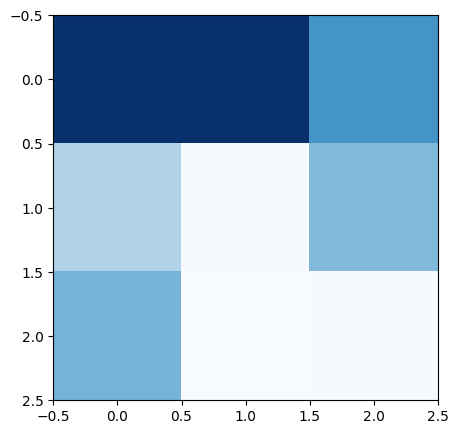

In [2]:
import matplotlib.pyplot as plt

# Visualize the generated archetypes

plt.figure(figsize=(5, 5))
plt.imshow(archetypes, cmap="Blues")
plt.show()

## Step 3: Create an Archetypal Dataset

Generate the archetypal dataset using the generated archetypes.

In [3]:
X, labels = make_archetypal_dataset(
    shape=(100, 100), alpha=0.4, archetypes=archetypes, noise=0.01, generator=123
)

## Step 4: Visualize the Generated Dataset

Visualize the archetypal dataset.

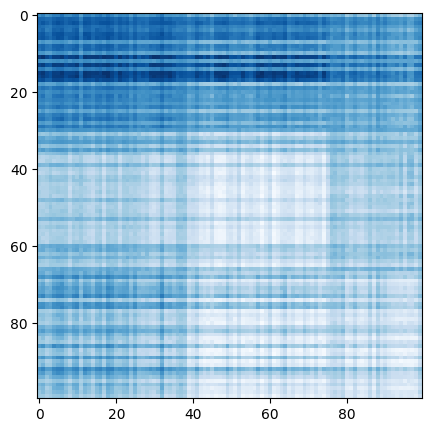

In [4]:
import matplotlib.pyplot as plt

# Visualize the generated dataset

plt.figure(figsize=(5, 5))
plt.imshow(X, cmap="Blues")
plt.show()

## Step 5: Initialize and Fit the BiAA Model

Initialize the BiAA model with specified parameters and fit it to the generated dataset.

In [5]:
from archetypes.jax import BiAA

# Define method-specific arguments

method_kwargs = {"optimizer": "sgd", "optimizer_kwargs": {"learning_rate": 5e-2}}

# Initialize the BiAA model

model = BiAA(
    n_archetypes=n_archetypes,
    max_iter=1_000,
    tol=1e-3,
    method="autogd",
    method_kwargs=method_kwargs,
    init="uniform",
    seed=123,
)

# Fit the model to the dataset

model.fit(X)

BiAA(init_kwargs={}, max_iter=1000,
     method_kwargs={'optimizer': 'sgd',
                    'optimizer_kwargs': {'learning_rate': 0.05}},
     n_archetypes=(3, 3), seed=123, tol=0.001)

## Step 6: Visualize the Learned Archetypes

Visualize the learned archetypes after fitting the model.

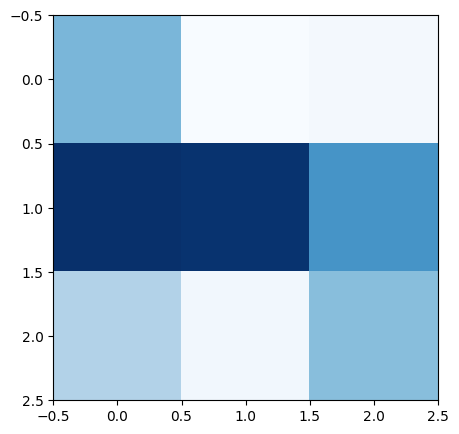

In [6]:
plt.figure(figsize=(5, 5))
plt.imshow(model.archetypes_, cmap="Blues")
plt.show()

## Step 7: Visualize the Similarity Degrees

Use the simplex visualization to plot the similarity degrees of the archetypes.

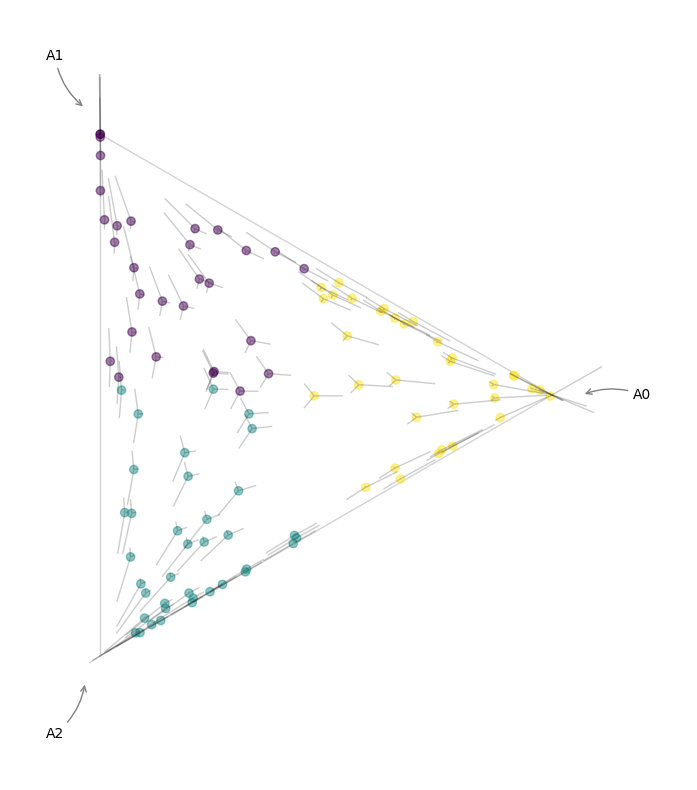

In [7]:
import matplotlib.pyplot as plt
from archetypes.visualization import simplex

plt.figure(figsize=(10, 10))
simplex(
    model.similarity_degree_[0],
    c=labels[0],
    alpha=0.5,
    show_circle=False,
    show_direction=True,
)

plt.show()

## Step 8: Plot Model Loss

Plot the loss to visualize the convergence of the model.

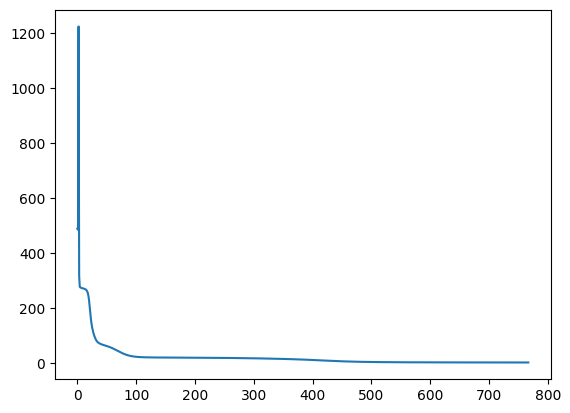

In [8]:
plt.plot(model.loss_)

By following this tutorial, you should be able to perform Biarchetypal Analysis using the Archetypes package, visualize the generated archetypes, and understand the results effectively. If you have any questions or encounter any issues, please don't hesitate to reach out to us. We hope you find this tutorial helpful in learning about BiAA and using the Archetypes package!